read image from dataset

In [1]:
from utils import list_all_files
negative_paths = list(list_all_files('../dataset/Gender/cropImage/Female/', ['.jpg']))
print 'loaded', len(negative_paths), 'female examples'
positive_paths = list(list_all_files('../dataset/Gender/cropImage/Male', ['.jpg']))
print 'loaded', len(positive_paths), 'male examples'
examples = [(path, 0) for path in negative_paths] + [(path, 1) for path in positive_paths]

loaded 30119 female examples
loaded 8229 male examples


For each path, we will load the image with `imread` and resize from 64x64 to 32x32 with `block_reduce`. This can take up to **10 seconds**.

In [4]:
import numpy as np
from skimage.measure import block_reduce
from skimage.io import imread

def examples_to_dataset(examples, block_size=2):
    X = []
    y = []
    for path, label in examples:
        img = imread(path, as_grey=True)
        img = block_reduce(img, block_size=(block_size, block_size), func=np.mean)
        X.append(img)
        y.append(label)
    return np.asarray(X), np.asarray(y)

%time X, y = examples_to_dataset(examples)

CPU times: user 31 s, sys: 5.98 s, total: 37 s
Wall time: 48.3 s


Then we turn `X` and `y` into numpy arrays and coerce them into the right shape and range.

In [5]:
X = X.astype(np.float32) / 255.
y = y.astype(np.int32)
print X.dtype, X.min(), X.max(), X.shape
print y.dtype, y.min(), y.max(), y.shape

float32 0.0 1.0 (38348, 32, 32)
int32 0 1 (38348,)


Let's take a look at a few of the images.

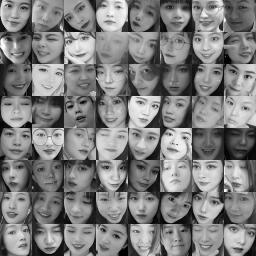

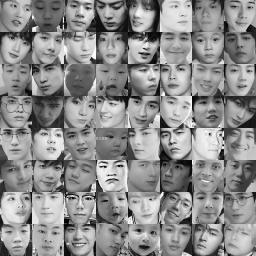

In [6]:
from utils import make_mosaic, show_array
show_array(255 * make_mosaic(X[:len(negative_paths)], 8), fmt='jpeg') # negative at the beginning
show_array(255 * make_mosaic(X[-len(positive_paths):], 8), fmt='jpeg') # positive at the end

Now we save the data to disk for so we can load it quickly when working with it later. Keras likes to use data in the (rows, cols, channels) format so we make a small change to the images before saving them.

In [7]:
X = np.expand_dims(X, axis=-1)
np.save('X.npy', X)
np.save('y.npy', y)